#### Procesamiento anterior de los datos

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import cycle, islice

%matplotlib inline

In [2]:
entrenamiento_df = pd.read_csv('Archivos/entrenamiento_df.csv')

In [3]:
entrenamiento_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [5]:
test_df = pd.read_csv('Archivos/test_df.csv')
test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [6]:
# 'longitud_text' contiene la longitud de la columna 'text'. 
test_df['text']=test_df['text'].astype(str)
test_df['longitud_text']=test_df.text.str.len()
test_df.head(10)

,id,keyword,location,text,longitud_text
0,0,NaN,NaN,Just happened a terrible car crash,34
1,2,NaN,NaN,"Heard about #earthquake is different cities, s...",64
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are...",96
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires,40
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan,45
5,12,NaN,NaN,We're shaking...It's an earthquake,34
6,21,NaN,NaN,They'd probably still show more life than Arse...,72
7,22,NaN,NaN,Hey! How are you?,17
8,27,NaN,NaN,What a nice hat?,16
9,29,NaN,NaN,Fuck off!,9


In [7]:
#agrego columna: cantidad de palabras de text

test_df['cantidad_palabras']=test_df['text'].apply(lambda x: len(x.split()) )
test_df.head(10)

,id,keyword,location,text,longitud_text,cantidad_palabras
0,0,NaN,NaN,Just happened a terrible car crash,34,6
1,2,NaN,NaN,"Heard about #earthquake is different cities, s...",64,9
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are...",96,19
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires,40,4
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan,45,8
5,12,NaN,NaN,We're shaking...It's an earthquake,34,4
6,21,NaN,NaN,They'd probably still show more life than Arse...,72,12
7,22,NaN,NaN,Hey! How are you?,17,4
8,27,NaN,NaN,What a nice hat?,16,4
9,29,NaN,NaN,Fuck off!,9,2


In [8]:
# 'longitud_text' contiene la longitud de la columna 'text'. 
entrenamiento_df['text']=entrenamiento_df['text'].astype(str)
entrenamiento_df['longitud_text']=entrenamiento_df.text.str.len()
entrenamiento_df.head(10)

,id,keyword,location,text,target,longitud_text
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1,110
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1,95
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1,59
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1,79
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1,52


In [9]:
#agrego columna: cantidad de palabras de text

entrenamiento_df['cantidad_palabras']=entrenamiento_df['text'].apply(lambda x: len(x.split()) )
entrenamiento_df.head(10)


,id,keyword,location,text,target,longitud_text,cantidad_palabras
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69,13
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38,7
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133,22
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65,8
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88,16
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1,110,18
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1,95,14
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1,59,15
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1,79,12
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1,52,10


### Agrego features

In [10]:
entrenamiento_df = entrenamiento_df.fillna('0')
train = entrenamiento_df.drop(['id','keyword','location','text'], axis=1)

In [11]:
train.head()

,target,longitud_text,cantidad_palabras
0,1,69,13
1,1,38,7
2,1,133,22
3,1,65,8
4,1,88,16


In [12]:
# Agrego la columna keyword_mean con mean encoding
mean_keyword = entrenamiento_df.groupby('keyword')['target'].mean()
mean_keyword[:5]

keyword
0                    0.688525
ablaze               0.361111
accident             0.685714
aftershock           0.000000
airplane accident    0.857143
Name: target, dtype: float64

In [13]:
train['keyword_mean'] = entrenamiento_df['keyword'].replace(mean_keyword)
train.head()

,target,longitud_text,cantidad_palabras,keyword_mean
0,1,69,13,0.688525
1,1,38,7,0.688525
2,1,133,22,0.688525
3,1,65,8,0.688525
4,1,88,16,0.688525


In [14]:
# Agrego la columna location_mean con mean encoding
mean_location = entrenamiento_df.groupby('location')['target'].mean()
train['location_mean'] = entrenamiento_df['location'].replace(mean_location)
train.head()

,target,longitud_text,cantidad_palabras,keyword_mean,location_mean
0,1,69,13,0.688525,0.424398
1,1,38,7,0.688525,0.424398
2,1,133,22,0.688525,0.424398
3,1,65,8,0.688525,0.424398
4,1,88,16,0.688525,0.424398


In [15]:
# Agrego columna numerales con la suma de los numerales del texto
train['numerales'] = entrenamiento_df['text'].agg(lambda x: x.count('#'))

In [16]:
train.head()

,target,longitud_text,cantidad_palabras,keyword_mean,location_mean,numerales
0,1,69,13,0.688525,0.424398,1
1,1,38,7,0.688525,0.424398,0
2,1,133,22,0.688525,0.424398,0
3,1,65,8,0.688525,0.424398,1
4,1,88,16,0.688525,0.424398,2


In [17]:
train.to_csv('Archivos/train_5_features.csv', index=False)

### Entrenamiento con Random Forest

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [19]:
X, y = train.iloc[:,1:], train.iloc[:,0]

In [20]:
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.2, random_state=123)

In [21]:
rf = RandomForestClassifier(n_estimators= 100)

In [22]:
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [23]:
preds = rf.predict(X_test)

In [24]:
accuracy = accuracy_score(y_test, preds)
trues = accuracy_score(y_test, preds, normalize=False)
print("Accuracy: %f \t Acertados %i de %i" % (accuracy, trues, preds.size))

Accuracy: 0.863427 	 Acertados 1315 de 1523


In [25]:
def hiperparametrosRF():
    rf = RandomForestClassifier(n_estimators= estimators, max_depth=depth,\
                                min_samples_split=min_split,\
                                min_samples_leaf=min_leaf, max_features=features)
    rf.fit(X_train,y_train)
    preds = rf.predict(X_test)
    accuracy = accuracy_score(y_test, preds)
    trues = accuracy_score(y_test, preds, normalize=False)
    print("\tAccuracy: %f \tAcertados %i de %i" % (accuracy, trues, preds.size))

In [26]:
estimators = 100
depth = None
min_split = 2
min_leaf = 1
features = 5

In [27]:
for i in [50,75,100,125,150,200]:
    estimators = i
    print("Estimator %i:" %i)
    hiperparametrosRF()

Estimator 50:
	Accuracy: 0.858831 	Acertados 1308 de 1523
Estimator 75:
	Accuracy: 0.860144 	Acertados 1310 de 1523
Estimator 100:
	Accuracy: 0.859488 	Acertados 1309 de 1523
Estimator 125:
	Accuracy: 0.858831 	Acertados 1308 de 1523
Estimator 150:
	Accuracy: 0.864741 	Acertados 1317 de 1523
Estimator 200:
	Accuracy: 0.858831 	Acertados 1308 de 1523


In [28]:
estimators = 100

In [29]:
for i in [1,3,5,8,10]:
    depth = i
    print("Max_depth %i:" %i)
    hiperparametrosRF()

Max_depth 1:
	Accuracy: 0.768877 	Acertados 1171 de 1523
Max_depth 3:
	Accuracy: 0.863427 	Acertados 1315 de 1523
Max_depth 5:
	Accuracy: 0.871963 	Acertados 1328 de 1523
Max_depth 8:
	Accuracy: 0.874590 	Acertados 1332 de 1523
Max_depth 10:
	Accuracy: 0.872620 	Acertados 1329 de 1523


In [30]:
depth = 10

In [31]:
for i in [3,5,8,15,30,45,60]:
    min_split = i
    print("Min_samples_split %i:" %i)
    hiperparametrosRF()

Min_samples_split 3:
	Accuracy: 0.873276 	Acertados 1330 de 1523
Min_samples_split 5:
	Accuracy: 0.871307 	Acertados 1327 de 1523
Min_samples_split 8:
	Accuracy: 0.872620 	Acertados 1329 de 1523
Min_samples_split 15:
	Accuracy: 0.873276 	Acertados 1330 de 1523
Min_samples_split 30:
	Accuracy: 0.875246 	Acertados 1333 de 1523
Min_samples_split 45:
	Accuracy: 0.879186 	Acertados 1339 de 1523
Min_samples_split 60:
	Accuracy: 0.878529 	Acertados 1338 de 1523


In [32]:
for i in [1,2,3]:
    min_leaf = i
    print("Min_samples_leaf %i:" %i)
    hiperparametrosRF()

Min_samples_leaf 1:
	Accuracy: 0.879842 	Acertados 1340 de 1523
Min_samples_leaf 2:
	Accuracy: 0.879186 	Acertados 1339 de 1523
Min_samples_leaf 3:
	Accuracy: 0.878529 	Acertados 1338 de 1523


In [33]:
for i in [1,2,3,4,5]:
    features = i
    print("Features %i:" %i)
    hiperparametrosRF()

Features 1:
	Accuracy: 0.875903 	Acertados 1334 de 1523
Features 2:
	Accuracy: 0.881156 	Acertados 1342 de 1523
Features 3:
	Accuracy: 0.879842 	Acertados 1340 de 1523
Features 4:
	Accuracy: 0.876559 	Acertados 1335 de 1523
Features 5:
	Accuracy: 0.877873 	Acertados 1337 de 1523


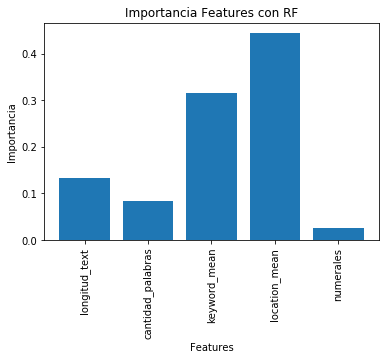

In [34]:
plt.bar(X_train.columns, rf.feature_importances_)
plt.xlabel('Features')
plt.ylabel('Importancia')
plt.title('Importancia Features con RF')
plt.xticks(rotation=90)
plt.show()

In [35]:
rf = RandomForestClassifier(n_estimators=100, max_depth=10,\
                                min_samples_split=60,\
                                min_samples_leaf=3)
rf.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=60,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

### Predicción con Random Forest

In [45]:
test_df = test_df.fillna('0')
test = test_df.drop(['id','keyword','location','text'], axis=1)
test.shape

(3263, 2)

In [46]:
# Agrego la columna keyword_mean con el mean encoding del set train
test['keyword_mean'] = test_df['keyword'].replace(mean_keyword)

In [47]:
# Agrego la columna location_mean con el mean encoding del set train
test['location_mean'] = test_df['location'].replace(mean_location)

In [48]:
# Agrego columna numerales con la suma de los numerales del texto
test['numerales'] = test_df['text'].agg(lambda x: x.count('#'))

In [49]:
test.head()

,longitud_text,cantidad_palabras,keyword_mean,location_mean,numerales
0,34,6,0.688525,0.424398,0
1,64,9,0.688525,0.424398,1
2,96,19,0.688525,0.424398,0
3,40,4,0.688525,0.424398,2
4,45,8,0.688525,0.424398,0


In [50]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 5 columns):
longitud_text        3263 non-null int64
cantidad_palabras    3263 non-null int64
keyword_mean         3263 non-null float64
location_mean        3263 non-null object
numerales            3263 non-null int64
dtypes: float64(1), int64(3), object(1)
memory usage: 127.5+ KB


In [51]:
# A las ubicaciones que no estuvieron en el train les asigno el valor 0.5
ubicaciones = test['location_mean'].agg(lambda x: pd.api.types.is_float(x))
test['location_mean'] = test['location_mean'].where(ubicaciones,0.5)

In [52]:
test.to_csv('Archivos/test_5_features.csv', index=False)

In [43]:
preds = rf.predict(test)

In [44]:
preds

array([0, 1, 1, ..., 1, 1, 1])

In [174]:
len(preds)

3263

In [176]:
target = pd.DataFrame({'id':test_df['id'], 'target':preds})

In [177]:
target.head()

,id,target
0,0,0
1,2,1
2,3,1
3,9,0
4,11,0


In [179]:
target.to_csv('Submits/submit_random_forest_1.csv', index=False)